# Figure 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

import replay_structure.metadata as meta
import replay_structure.read_write as read_write

In [2]:
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7

plt.rc('font', size=SMALL_SIZE, family='sans-serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=2, color='r')
plt.rcParams['font.sans-serif'] = ['Helvetica']

In [3]:
session = meta.Session_List[0]
rd = read_write.load_ratday_data(session)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/ratday/rat1day1_4cm.obj


In [14]:
simulated_trajectories = dict()
for session in meta.Simulated_Session_List:
    simulated_trajectories[str(session)] = read_write.load_model_recovery_simulated_trajectory_set(meta.Poisson_Simulated_Ripple_Data.name, session.model.name)

loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/poisson_simulated_ripples/diffusion_simulated_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/poisson_simulated_ripples/momentum_simulated_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/poisson_simulated_ripples/stationary_simulated_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/poisson_simulated_ripples/stationary_gaussian_simulated_trajectories.obj
loading  /Users/emmakrause/Documents/PhD/Lab/replay_structure/data_final/poisson_simulated_ripples/random_simulated_trajectories.obj


## Example of spiking data within behavior and SWR

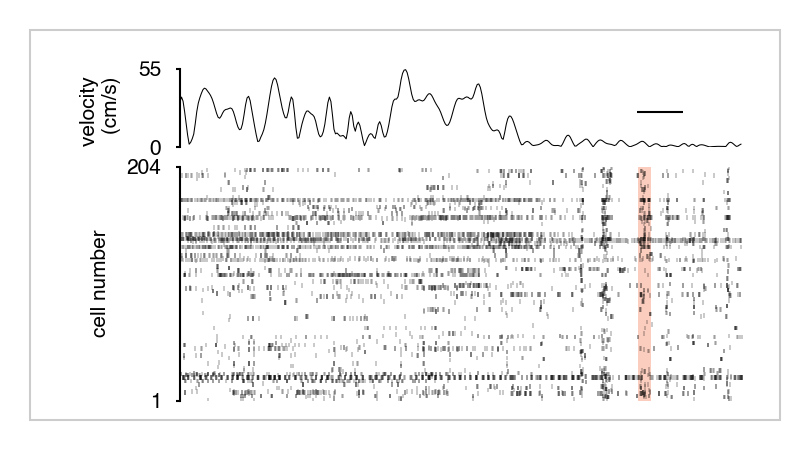

12.292761716796576


In [4]:
ripple_ind = 13
n_cells = 203

start_buffer = 10 #s
end_buffer = 2 #s
ripple_times = rd.data['ripple_times_s'][ripple_ind]
plot_start_time = ripple_times[0] - start_buffer
plot_end_time = ripple_times[1] + end_buffer

velocity_start_ind = int((plot_start_time - rd.velocity_info['vel_times_s'][0]) / (1/30))
velocity_end_ind = int((plot_end_time - rd.velocity_info['vel_times_s'][0]) / (1/30))
velocity_plot = rd.velocity_info['vel_cm_per_s'][velocity_start_ind:velocity_end_ind]
vel_max = np.ceil(np.max(velocity_plot))

spike_ids = rd.data['spike_ids'][(rd.data['spike_times_s'] > plot_start_time) & (rd.data['spike_times_s'] < plot_end_time)]
spike_times = rd.data['spike_times_s'][(rd.data['spike_times_s'] > plot_start_time) & (rd.data['spike_times_s'] < plot_end_time)]


fig = plt.figure(figsize=(2.5,1.3), dpi=300)
velocity_height = .2
raster_height = .6
footer = .05
left = .2
h_space= .05
width = .75

ax = dict()
ax[0] = fig.add_axes([left, footer+raster_height+h_space, width, velocity_height ])
ax[1] = fig.add_axes([left, footer, width, raster_height])

ax[0].plot(velocity_plot, linewidth=.25, color='black')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_linewidth(.5)
ax[0].set_yticks([0, vel_max])
ax[0].set_ylim([0, vel_max])
ax[0].set_ylabel('velocity \n (cm/s)', rotation=90)
ax[0].tick_params(direction='out', length=1, width=.5)
ax[0].set_xticks([])
ax[0].set_xlim([0, velocity_end_ind-velocity_start_ind])

scale_bar_start = 300
fps = 30
ax[0].hlines(25, scale_bar_start, scale_bar_start+fps, linewidth=.5)

for i, pf_id in enumerate(rd.place_field_data['place_cell_ids']):
    pf_spike_times = spike_times[spike_ids == (i)]
    ax[1].eventplot(pf_spike_times, lineoffsets=i, orientation="horizontal", linelengths=4, linewidths=.1, color='black')

ax[1].axvspan(ripple_times[0], ripple_times[1], alpha=0.3, color='#f15a29', linewidth=0)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_linewidth(.5)
ax[1].set_ylabel('cell number', rotation=90)
ax[1].set_yticks([0, len(rd.place_field_data['place_cell_ids'])])
ax[1].set_yticklabels([1, len(rd.place_field_data['place_cell_ids']) + 1])
ax[1].tick_params(direction='out', length=1, width=.5)
ax[1].set_xticks([])
ax[1].set_ylim([0, len(rd.place_field_data['place_cell_ids'])])
ax[1].set_xlim([plot_start_time, plot_end_time])


plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure1b.svg"), dpi=300, transparent=True, format='svg')

rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()

print(plot_end_time - plot_start_time)

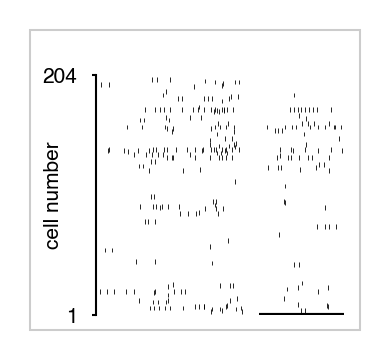

In [5]:
ripple_ind = 13

start_buffer = 0 #s
end_buffer = 0 #s
ripple_times = rd.data['ripple_times_s'][ripple_ind]
plot_start_time = ripple_times[0] - start_buffer
plot_end_time = ripple_times[1] + end_buffer

spike_ids = rd.data['spike_ids'][(rd.data['spike_times_s'] > plot_start_time) & (rd.data['spike_times_s'] < plot_end_time)]
spike_times = rd.data['spike_times_s'][(rd.data['spike_times_s'] > plot_start_time) & (rd.data['spike_times_s'] < plot_end_time)]


fig = plt.figure(figsize=(1.1,1), dpi=300)
raster_height = .8
footer = .05
left = .2
h_space= .05
width = .75

ax = dict()
ax[1] = fig.add_axes([left, footer, width, raster_height])

for i, pf_id in enumerate(rd.place_field_data['place_cell_ids']):
    pf_spike_times = spike_times[spike_ids == (i)]
    for time in pf_spike_times:
        ax[1].eventplot([time], lineoffsets=i, orientation="horizontal", linelengths=4, linewidths=.2, color='black')

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_linewidth(.5)
ax[1].set_ylabel('cell number', rotation=90, labelpad=-5)
ax[1].set_yticks([0, len(rd.place_field_data['place_cell_ids'])])
ax[1].set_yticklabels([1, len(rd.place_field_data['place_cell_ids']) + 1])
ax[1].tick_params(direction='out', length=1, width=.5)
ax[1].set_xticks([])
ax[1].set_xticklabels(['',''])
ax[1].set_ylim([0, len(rd.place_field_data['place_cell_ids'])])
ax[1].set_xlim([plot_start_time, plot_end_time])
ax[1].hlines(0,plot_end_time-.1, plot_end_time, linewidth=1)


plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure1d.svg"), dpi=300, transparent=True)

rect = plt.Rectangle(
    # (lower-left corner), width, height
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()

## Example place fields

8.745924497917517
19.905555186416322
15.890256393871987
21.65580626886384


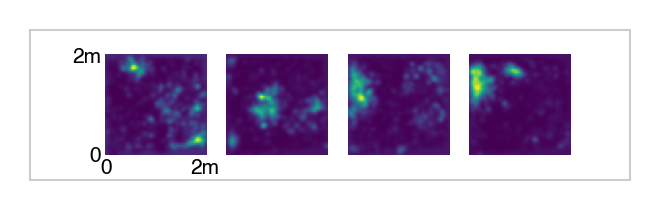

In [6]:
pf_examples = [0,1,2,3]
fig, ax = plt.subplots(1,4, figsize=(2,.5), dpi=300)

for i in range (4):
    ax[i].imshow(rd.place_field_data['place_fields'][pf_examples[i]], origin='lower')
    print(rd.place_field_data['place_fields'][pf_examples[i]].max())
    
ax[0].set_xticks([0,49])
ax[0].set_xticklabels([0,"2m"])
ax[0].set_yticks([0,49])
ax[0].set_yticklabels([0,"2m"])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].tick_params(direction='out', length=0, width=.5, pad=1)

for i in range(1,4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure1c.svg"), dpi=300, transparent=True)

rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

plt.show()

## Example simulated trajectories

In [7]:
cdict = {
    'orange': "#fbb040",
    'dark_orange': "#f4933c",
    'red': '#e9423a',
    'purple': "#9e1f63"
}
clist = ["#fbb040","#f4933c", '#e9423a', "#9e1f63" ]

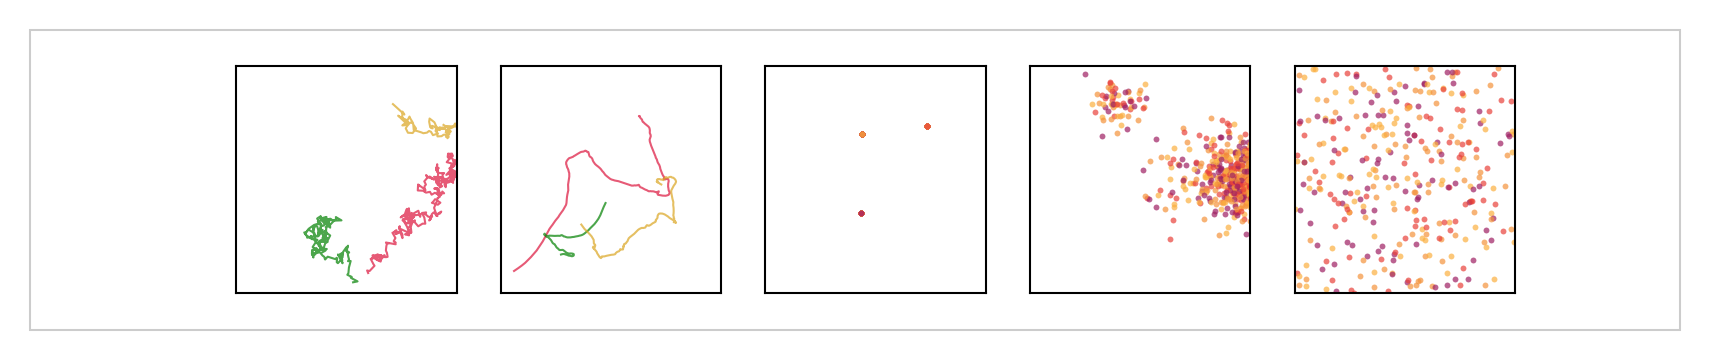

In [277]:
colors = ['crimson', 'green', 'goldenrod']

plot_ind = {
    'diffusion': [0,31,38],
    'momentum': [86, 82,48],
    'stationary': [2,3,8],
    'stationary_gaussian': [0,3,7],
    'random': [1,3,4]
}


fig, ax = plt.subplots(1,5, figsize=(5.5,1), dpi=300)
for j, session in enumerate(meta.Simulated_Session_List):
    for i in range(3):
        if session.model.temporal:
            ax[j].plot(simulated_trajectories[str(session)].trajectory_info["trajectories_cm"][plot_ind[str(session)][i]][:,0], 
                       simulated_trajectories[str(session)].trajectory_info["trajectories_cm"][plot_ind[str(session)][i]][:,1], 
                       alpha=.7, linewidth=.5, color=colors[i])
        else:
            for m in range(len(simulated_trajectories[str(session)].trajectory_info["trajectories_cm"][plot_ind[str(session)][i]])):
                ax[j].scatter(simulated_trajectories[str(session)].trajectory_info["trajectories_cm"][plot_ind[str(session)][i]][m,0], 
                       simulated_trajectories[str(session)].trajectory_info["trajectories_cm"][plot_ind[str(session)][i]][m,1], 
                       s=2,alpha=.7, color=clist[m%4], linewidth=0)
        ax[j].set_xticks([])
        ax[j].set_yticks([])
        ax[j].spines['top'].set_linewidth(.5)
        ax[j].spines['bottom'].set_linewidth(.5)
        ax[j].spines['left'].set_linewidth(.5)
        ax[j].spines['right'].set_linewidth(.5)
        ax[j].set_xlim([0,200])
        ax[j].set_ylim([0,200])
        
        
plt.savefig(os.path.join(meta.FIGURES_PATH, "Figure1e.pdf"), dpi=300, transparent=True)

rect = plt.Rectangle(
    (0, 0), 1, 1, fill=False, color="k", lw=.5, alpha=.2,
    zorder=1000, transform=fig.transFigure, figure=fig
)
fig.patches.extend([rect])

